In [1]:
import acquire
import model
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = acquire.get_wine()

In [5]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model.train_validate_test_dummy(df, 'quality')

In [6]:
X_train_scaled, X_validate_scaled, X_test_scaled = model.scale_data(X_train, X_validate, X_test)

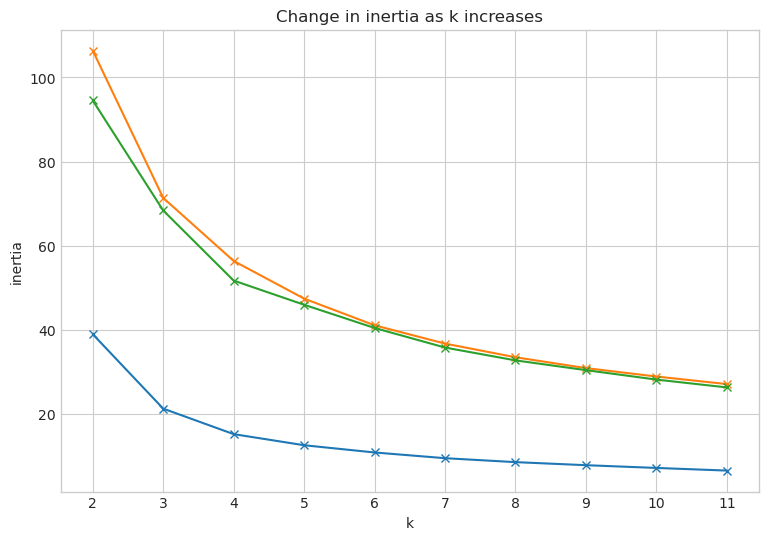

In [7]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_scaled[['density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
    pd.Series({k: KMeans(k).fit(X_train_scaled[['residual sugar', 'alcohol', 'total sulfur dioxide']]).inertia_ for k in range(2, 12)}).plot(marker='x')
    pd.Series({k: KMeans(k).fit(X_train_scaled[['volatile acidity', 'chlorides', 'density', 'alcohol']]).inertia_ for k in range(2, 12)}).plot(marker='x')
   
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [9]:
X_train_2_features = X_train_scaled[['density', 'alcohol']]
X_validate_2_features = X_validate_scaled[['density', 'alcohol']]


kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(X_train_2_features)

X_train['2_cluster'] = kmeans2.predict(X_train_2_features)
X_validate['2_cluster'] = kmeans2.predict(X_validate_2_features)

In [10]:
X_train_3_features = X_train_scaled[['residual sugar', 'total sulfur dioxide', 'alcohol']]
X_train_3_features
X_validate_3_features = X_validate_scaled[['residual sugar', 'total sulfur dioxide', 'alcohol']]
X_validate_3_features

kmeans3 = KMeans(n_clusters=4)
kmeans3.fit(X_train_3_features)

X_train['3_cluster'] = kmeans3.predict(X_train_3_features)
X_validate['3_cluster'] = kmeans3.predict(X_validate_3_features)

In [11]:
X_train_4_features = X_train_scaled[['volatile acidity', 'chlorides', 'density', 'alcohol']]
X_train_4_features
X_validate_4_features = X_validate_scaled[['volatile acidity', 'chlorides', 'density', 'alcohol']]
X_validate_4_features

kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X_train_4_features)

X_train['4_cluster'] = kmeans4.predict(X_train_4_features)
X_validate['4_cluster'] = kmeans4.predict(X_validate_4_features)

In [12]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,2_cluster,3_cluster,4_cluster
2138,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,1,3,3,0
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0,0,0,1
601,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,1,1,3,0
2540,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,1,3,3,0
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,5.1,0.21,0.28,1.40,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1,3,3,0
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5,1,0,1,2
285,7.3,0.32,0.25,7.20,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,1,0,1,2
607,7.3,0.25,0.29,7.50,0.049,38.0,158.0,0.99650,3.43,0.38,9.6,1,0,1,2


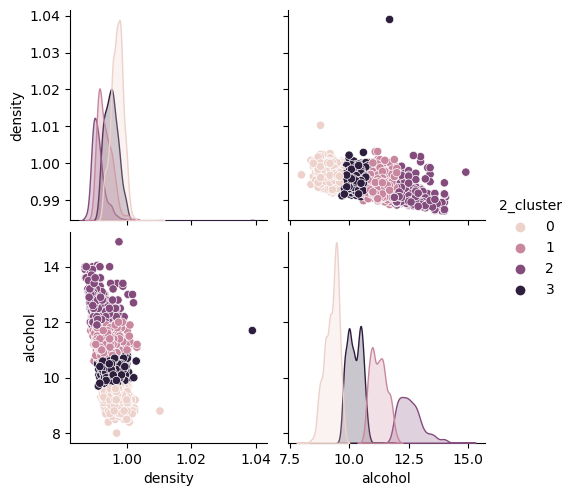

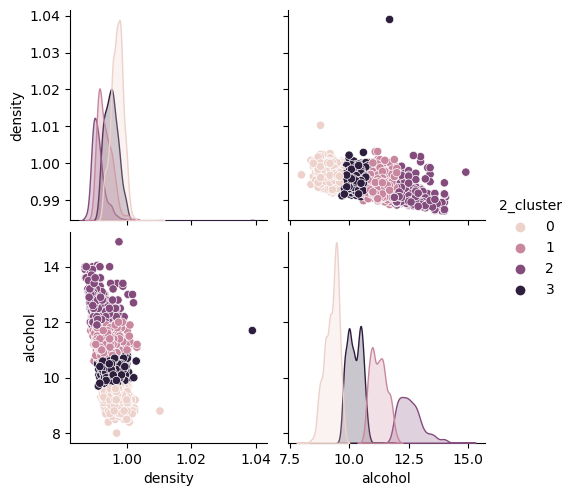

In [14]:
sns.pairplot(X_train, x_vars=['density', 'alcohol'], y_vars=['density', 'alcohol'], hue='2_cluster')
plt.show()